In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install pycountry pycountry-convert
# import pycountry
# from pycountry_convert import country_alpha2_to_continent_code, convert_continent_code_to_continent_name

# def country_to_continent(country_name):
#     try:
#         country = pycountry.countries.search_fuzzy(country_name)
#         if country:
#             alpha2_code = country[0].alpha_2
#             continent_code = country_alpha2_to_continent_code(alpha2_code)
#             continent_name = convert_continent_code_to_continent_name(continent_code)
#             return continent_name
#         else:
#             return None
#     except LookupError:
#         return None
# df["continent"] = df["country"].apply(country_to_continent)
# columns_to_be_dropped = ['country', 'location_hq']
# df = df.drop(columns_to_be_dropped, axis=True)
# df.columns.values

In [ ]:
#import các thư viện cần thiết
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Đọc dữ liệu csv
df = pd.read_csv("/content/drive/MyDrive/dataset/DataSetBTL/Layoffs Dataset 2023/layoffs_data2.csv")
df.head(5)

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,IRL,SF Bay Area,Consumer,1.00,6/23/2023,https://www.theinformation.com/articles/social...,197.0,Series C,6/25/2023 23:04,United States,NaN,Unknown
1,Retool,SF Bay Area,Other,0.09,6/22/2023,Internal memo,141.0,Series C,6/22/2023 14:23,United States,NaN,Unknown
2,Anaplan,SF Bay Area,Other,NaN,6/21/2023,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,6/24/2023 3:48,United States,300.0,Unknown
3,Uber,SF Bay Area,Transportation,NaN,6/21/2023,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,6/22/2023 0:19,United States,200.0,Unknown
4,Tackle.io,Boise,Infrastructure,NaN,6/21/2023,https://tackle.io/blog/tackle-company-update/,148.0,Series C,6/23/2023 15:38,United States,75.0,Unknown


In [ ]:
df.shape

(2738, 12)

In [ ]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company                     2738 non-null   object 
 1   location_hq                 2738 non-null   object 
 2   industry                    2738 non-null   object 
 3   percentage                  1819 non-null   float64
 4   date                        2738 non-null   object 
 5   source                      2738 non-null   object 
 6   funds_raised                2466 non-null   float64
 7   stage                       2738 non-null   object 
 8   date_added                  2738 non-null   object 
 9   country                     2738 non-null   object 
 10  laid_off_count              1896 non-null   float64
 11  list_of_employees_laid_off  2737 non-null   object 
dtypes: float64(3), object(9)
memory usage: 256.8+ KB


In [ ]:
df.isnull().sum()
# df.isna().sum()

company                         0
location_hq                     0
industry                        0
percentage                    919
date                            0
source                          0
funds_raised                  272
stage                           0
date_added                      0
country                         0
laid_off_count                842
list_of_employees_laid_off      1
dtype: int64

In [ ]:
df.describe()

,percentage,funds_raised,laid_off_count
count,1819.000000,2466.000000,1896.000000
mean,0.265282,805.994118,246.485759
std,0.265125,5295.209903,810.252950
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,37.000000
50%,0.170000,157.000000,80.000000
75%,0.300000,445.000000,172.250000
max,1.000000,121900.000000,12000.000000


In [ ]:
df['industry'].unique()

array(['Consumer', 'Other', 'Transportation', 'Infrastructure', 'Food',
       'Healthcare', 'Marketing', 'Media', 'HR', 'Retail', 'Crypto',
       'Education', 'Finance', 'Security', 'Product', 'Sales', 'Data',
       'Support', 'Real Estate', 'Aerospace', 'Manufacturing',
       'Logistics', 'Recruiting', 'Hardware', 'Legal', 'Travel',
       'Construction', 'Energy', 'Fitness'], dtype=object)

In [ ]:
df['country'].unique()

array(['United States', 'Canada', 'Singapore', 'Netherlands',
       'United Kingdom', 'India', 'South Korea', 'Brazil', 'Australia',
       'Kenya', 'Sweden', 'Germany', 'Israel', 'China', 'Poland',
       'Romania', 'Chile', 'Indonesia', 'France', 'Saudi Arabia',
       'Philippines', 'Nigeria', 'New Zealand', 'Spain', 'Mexico',
       'Austria', 'Ukraine', 'Switzerland', 'Ireland', 'Japan', 'Italy',
       'Estonia', 'Finland', 'Portugal', 'Colombia', 'Argentina',
       'Seychelles', 'Egypt', 'Luxembourg', 'Greece', 'Norway', 'Belgium',
       'Denmark', 'Hong Kong', 'Malaysia', 'Hungary', 'Vietnam',
       'Thailand', 'Lithuania', 'Ghana', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Turkey', 'Russia',
       'Uruguay', 'Bulgaria', 'South Africa', 'Czech Republic', 'Myanmar'],
      dtype=object)

In [ ]:
df['location_hq'].unique()

array(['SF Bay Area', 'Boise', 'Toronto', 'Alamosa', 'Singapore',
       'Amsterdam', 'London', 'Bengaluru', 'Tampa Bay', 'Phoenix',
       'Seattle', 'Los Angeles', 'Seoul', 'Kansas City', 'New York City',
       'Gurugram', 'Raleigh', 'Sao Paulo', 'Washington D.C.', 'Columbus',
       'Denver', 'Melbourne', 'Baltimore', 'Nairobi', 'Stockholm', 'Reno',
       'Vancouver', 'Chemnitz', 'New Delhi', 'Berlin', 'Boston',
       'Chicago', 'Hamburg', 'Charlottesville', 'Kfar Saba', 'Hangzhou',
       'Krakow', 'Mumbai', 'Haifa', 'Santa Barbara', 'Houston',
       'Philadelphia', 'Tel Aviv', 'San Diego', 'Indianapolis', 'Norfolk',
       'Cluj-Napoca', 'Las Vegas', 'Santiago', 'Austin', 'Brisbane',
       'Ottawa', 'Dallas', 'Jakarta', 'Sydney', 'Paris', 'Noida',
       'Montreal', 'Chennai', 'Salt Lake City', 'Riyadh', 'Wrocław',
       'Manila', 'Cincinnati', 'Lagos', 'Little Rock', 'Ann Arbor',
       'Auckland', 'Cleveland', 'Madrid', 'Beijing', 'Charlotte',
       'Monterrey', 'Nashua',

In [ ]:
pd.crosstab(index=df['location_hq'], columns=df['country'])

country,Argentina,Australia,Austria,Bahrain,Belgium,Brazil,Bulgaria,Canada,Chile,China,...,Sweden,Switzerland,Thailand,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam
location_hq,,,,,,,,,,,,,,,,,,,,,
Accra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ahmedabad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alamosa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Albany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Amsterdam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winnipeg,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Wrocław,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yangon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


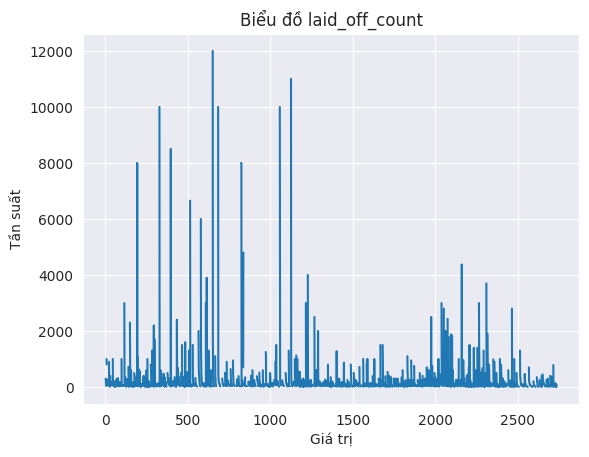

In [ ]:
plt.plot(df['laid_off_count'])
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.title('Biểu đồ laid_off_count')
plt.show()

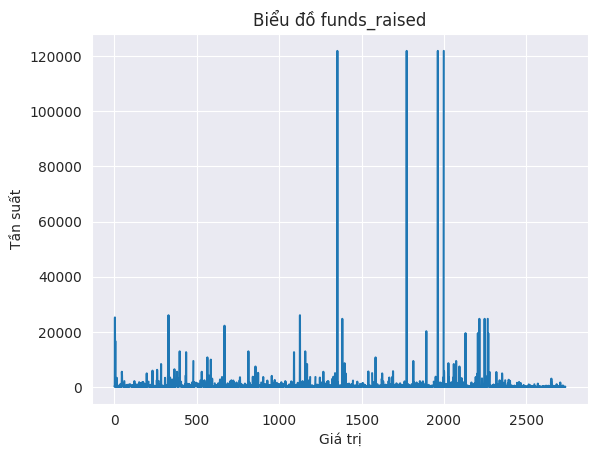

In [ ]:
plt.plot(df['funds_raised'])
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.title('Biểu đồ funds_raised')
plt.show()

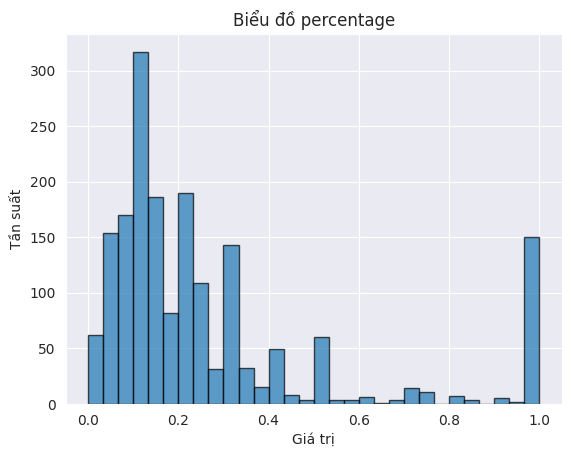

In [ ]:
plt.hist(df['percentage'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.title('Biểu đồ percentage')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
meanImputer = SimpleImputer(strategy='mean')
medianImputer = SimpleImputer(strategy='median')
df['laid_off_count'] = meanImputer.fit_transform(df[['laid_off_count']])
df['percentage'] = meanImputer.fit_transform(df[['percentage']])
df['funds_raised'] = medianImputer.fit_transform(df[['funds_raised']])
df.describe()

,percentage,funds_raised,laid_off_count
count,2738.000000,2738.000000,2738.000000
mean,0.265282,741.521364,246.485759
std,0.216078,5028.959960,674.198573
min,0.000000,0.000000,3.000000
25%,0.130000,59.000000,50.000000
50%,0.265282,157.000000,150.000000
75%,0.265282,385.750000,246.485759
max,1.000000,121900.000000,12000.000000


In [ ]:
# df['laid_off_count'] = df['laid_off_count'].replace(np.NaN, 80.000000)
# df['percentage'] = df['percentage'].replace(np.NaN, 0.265282)
# df['funds_raised'] = df['funds_raised'].replace(np.NaN, 157.000000)
df.isnull().sum()

company                       0
location_hq                   0
industry                      0
percentage                    0
date                          0
source                        0
funds_raised                  0
stage                         0
date_added                    0
country                       0
laid_off_count                0
list_of_employees_laid_off    1
dtype: int64

In [ ]:
columns_to_be_dropped = ['source', 'date_added', 'list_of_employees_laid_off', 'location_hq']
df = df.drop(columns_to_be_dropped, axis=True)
df.columns.values

array(['company', 'industry', 'percentage', 'date', 'funds_raised',
       'stage', 'country', 'laid_off_count'], dtype=object)

In [ ]:
duplicate_rows = df.duplicated(subset=["company", "industry", "date", "funds_raised", "stage"], keep=False)

df[duplicate_rows]

,company,industry,percentage,date,funds_raised,stage,country,laid_off_count
191,Rapid,Finance,0.500000,4/25/2023,272.0,Series D,United States,115.000000
192,Rapid,Finance,0.300000,4/25/2023,272.0,Series D,United States,70.000000
1547,Sendy,Logistics,0.200000,8/2/2022,26.0,Series B,Kenya,54.000000
1549,Sendy,Logistics,0.100000,8/2/2022,26.0,Series B,Kenya,30.000000
1694,Anodot,Data,0.270000,7/6/2022,64.0,Series C,United States,35.000000
1696,Anodot,Data,0.200000,7/6/2022,64.0,Series C,United States,15.000000
1751,StockX,Retail,0.080000,6/28/2022,690.0,Series E,United States,120.000000
1753,StockX,Retail,0.265282,6/28/2022,690.0,Series E,United States,80.000000
1786,IronNet,Security,0.350000,6/22/2022,410.0,Post-IPO,United States,90.000000
1788,IronNet,Security,0.170000,6/22/2022,410.0,Post-IPO,United States,55.000000


In [ ]:
subset_columns = ["company", "industry", "date", "funds_raised", "stage"]
duplicate_rows = df.duplicated(subset=subset_columns, keep="first")

# Loại bỏ các dòng trùng lặp
df = df[~duplicate_rows]
df.shape

(2729, 8)

In [ ]:
df[['month', 'day', 'year']] = df['date'].str.split('/', expand=True)

df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df = df.drop(columns=['date'])
df.head()

<ipython-input-21-b500fae21193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['month', 'day', 'year']] = df['date'].str.split('/', expand=True)
<ipython-input-21-b500fae21193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['month', 'day', 'year']] = df['date'].str.split('/', expand=True)
<ipython-input-21-b500fae21193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,company,industry,percentage,funds_raised,stage,country,laid_off_count,month,day,year
0,IRL,Consumer,1.000000,197.0,Series C,United States,246.485759,6,23,2023
1,Retool,Other,0.090000,141.0,Series C,United States,246.485759,6,22,2023
2,Anaplan,Other,0.265282,300.0,Acquired,United States,300.000000,6,21,2023
3,Uber,Transportation,0.265282,25200.0,Post-IPO,United States,200.000000,6,21,2023
4,Tackle.io,Infrastructure,0.265282,148.0,Series C,United States,75.000000,6,21,2023


In [ ]:
df.describe()

,percentage,funds_raised,laid_off_count,month,day,year
count,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000,2729.000000
mean,0.265431,742.361853,246.744609,5.749725,15.108465,2021.826676
std,0.216387,5037.115067,675.173679,3.284643,9.081657,1.105010
min,0.000000,0.000000,3.000000,1.000000,1.000000,2020.000000
25%,0.130000,59.000000,50.000000,3.000000,7.000000,2022.000000
50%,0.265282,157.000000,150.000000,5.000000,15.000000,2022.000000
75%,0.265282,383.000000,246.485759,8.000000,23.000000,2023.000000
max,1.000000,121900.000000,12000.000000,12.000000,31.000000,2023.000000


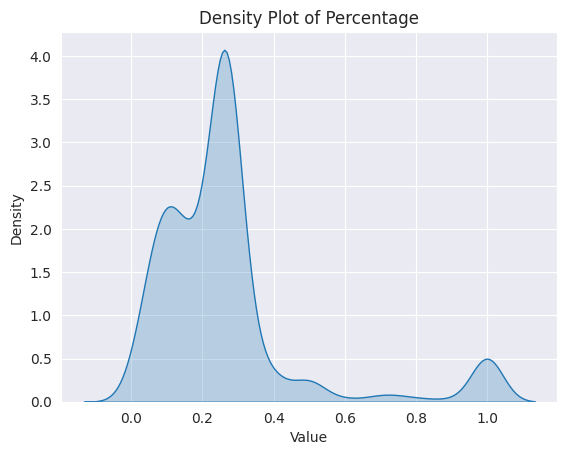

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ density plot cho một thuộc tính dữ liệu skewed
sns.kdeplot(df['percentage'], fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Percentage')
plt.show()

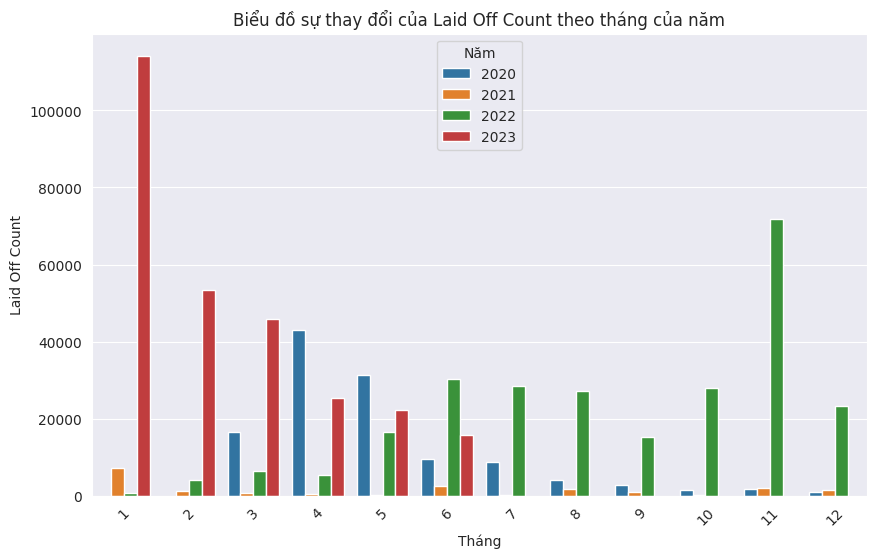

In [ ]:
import seaborn as sns

# Group dữ liệu theo tháng và năm, tính tổng laid_off_count
df_monthly = df.groupby(['year', 'month'])['laid_off_count'].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(data=df_monthly, x='month', y='laid_off_count', hue='year')
plt.xlabel('Tháng')
plt.ylabel('Laid Off Count')
plt.title('Biểu đồ sự thay đổi của Laid Off Count theo tháng của năm')
plt.xticks(rotation=45)
plt.legend(title='Năm')
plt.show()


<ipython-input-25-07d582e6b338>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='industry', y='laid_off_count', data=df.groupby('industry').sum().sort_values('laid_off_count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')
<ipython-input-25-07d582e6b338>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='industry', y='laid_off_count', data=df.groupby('industry').sum().sort_values('laid_off_count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')


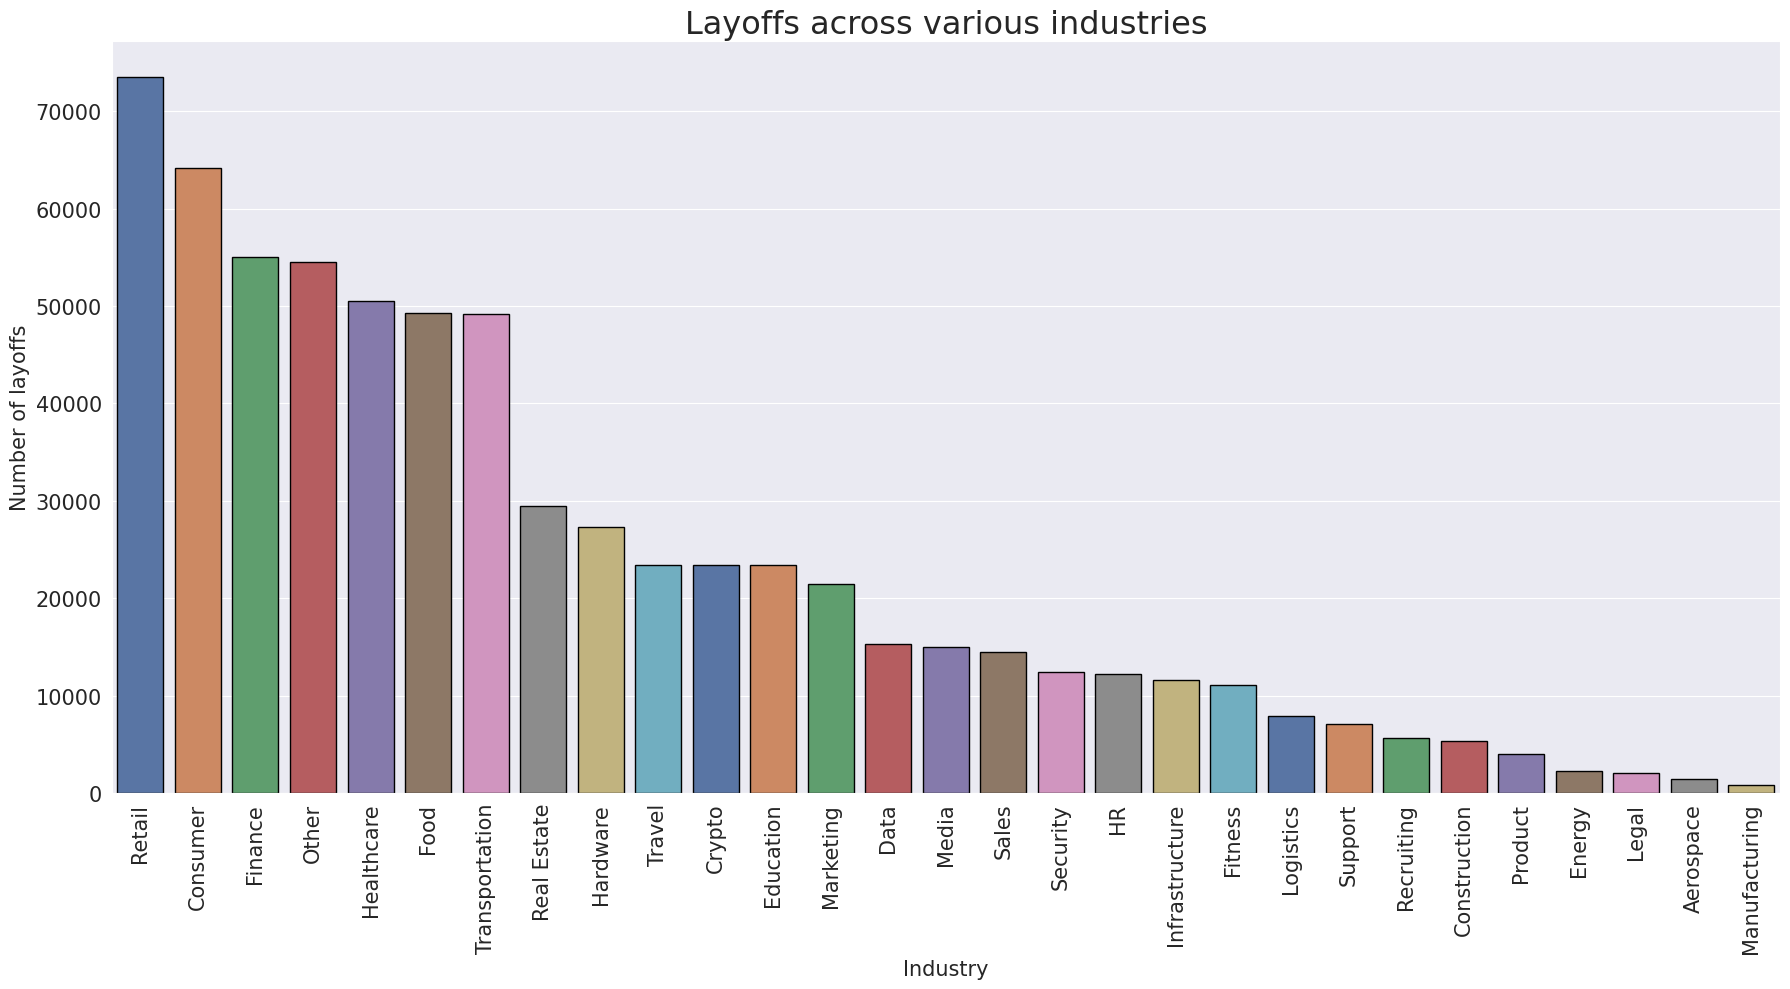

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(18,10))

sns.barplot(x='industry', y='laid_off_count', data=df.groupby('industry').sum().sort_values('laid_off_count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

plt.xlabel(xlabel='Industry', fontsize=15)
plt.ylabel(ylabel='Number of layoffs', fontsize=15)
plt.title('Layoffs across various industries', fontsize=23)

plt.tight_layout()

plt.show()

<ipython-input-26-4a1f70911be0>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='company', y='laid_off_count', data=top10_comp.groupby('company').sum().sort_values('laid_off_count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')
<ipython-input-26-4a1f70911be0>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='company', y='laid_off_count', data=top10_comp.groupby('company').sum().sort_values('laid_off_count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')


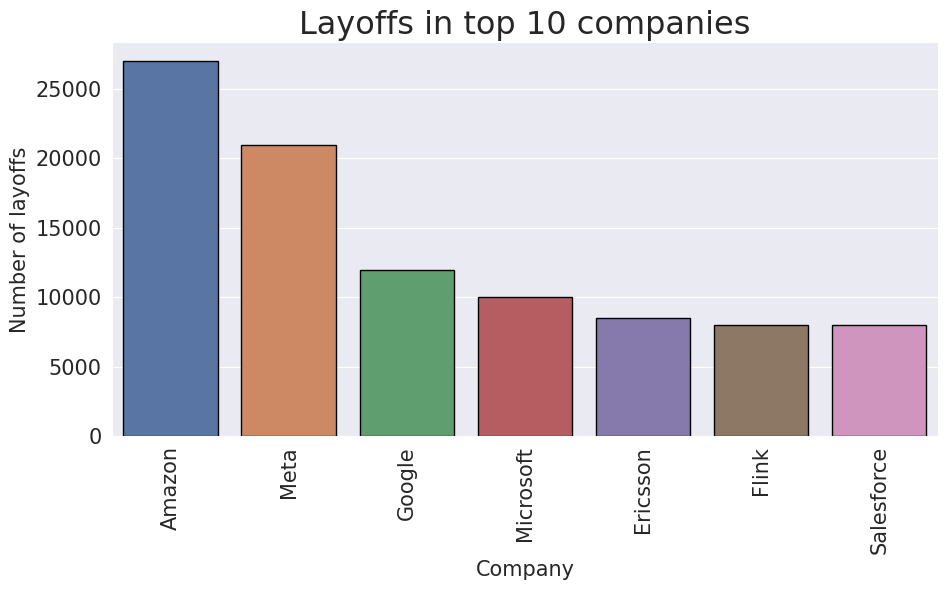

In [ ]:
top10_comp = df.sort_values('laid_off_count', ascending=False)
top10_comp = top10_comp.head(10)
sns.set_style('darkgrid')

plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

sns.barplot(x='company', y='laid_off_count', data=top10_comp.groupby('company').sum().sort_values('laid_off_count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')

plt.xticks(fontsize=15, rotation=90)

plt.yticks(fontsize=15)

plt.xlabel(xlabel='Company', fontsize=15)

plt.ylabel(ylabel='Number of layoffs', fontsize=15)

plt.title('Layoffs in top 10 companies', fontsize=23)

plt.tight_layout()
plt.show()

In [ ]:
# Group top10_comp dataframe by Country column and aggregate the sum of Laid_Off_Count for each country, then reset the index
df_agg = top10_comp.groupby(['country']).agg({'laid_off_count': 'sum'}).reset_index()

# Create a choropleth map using Plotly and assign it to the variable fig
fig = px.choropleth(df_agg, locations='country', locationmode='country names', color='laid_off_count', hover_name='country', projection='natural earth', title='Total Layoffs by Country')

# Display the figure
fig.show()

In [ ]:
# Import the plotly express and scatter_mapbox functions from the plotly library
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-app")

top10_comp['Latitude'] = top10_comp['country'].apply(lambda x: geolocator.geocode(x).latitude if geolocator.geocode(x) else None)
top10_comp['Longitude'] = top10_comp['country'].apply(lambda x: geolocator.geocode(x).longitude if geolocator.geocode(x) else None)
top10_comp_fig = px.scatter_mapbox(top10_comp,lat='Latitude',lon='Longitude', hover_name='country', hover_data=['laid_off_count', "company"],
    color='laid_off_count',
    size="laid_off_count", size_max=50, opacity=0.4,
    center={'lat':10, 'lon':30},
    zoom=1,
    height=400,width=1400,
    mapbox_style="open-street-map")

# Update the layout of the figure to remove the default margins
top10_comp_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Update the layout of the figure to add a title
top10_comp_fig.update_layout(title_text="Population of each cities")

# Display the figure
top10_comp_fig.show()

In [ ]:
df.info()
df = df.drop(columns=['company'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2729 entries, 0 to 2737
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         2729 non-null   object 
 1   industry        2729 non-null   object 
 2   percentage      2729 non-null   float64
 3   funds_raised    2729 non-null   float64
 4   stage           2729 non-null   object 
 5   country         2729 non-null   object 
 6   laid_off_count  2729 non-null   float64
 7   month           2729 non-null   int64  
 8   day             2729 non-null   int64  
 9   year            2729 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 234.5+ KB


<ipython-input-30-1520c320b7d4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



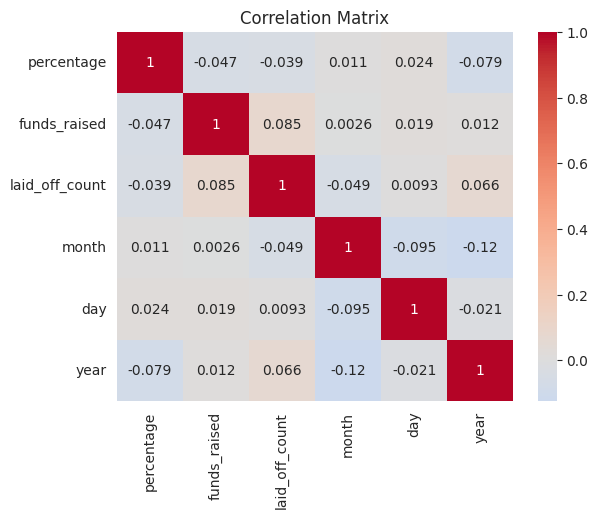

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import LabelEncoder

# df1 = df.copy()
# df2 = df.copy()
# # label encode
# le = LabelEncoder()
# # df1['location_hq'] = le.fit_transform(df1['location_hq'])
# df1['industry'] = le.fit_transform(df1['industry'])
# df1['country']= le.fit_transform(df1['country'])
# #one-hot encode
# df2 = pd.get_dummies(df2, columns=['industry', 'country'])


# enc = OrdinalEncoder(categories=[['Unknown', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E',
#           'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Private Equity',
#           'Post-IPO', 'Acquired', 'Subsidiary']])

# df1['stage'] = enc.fit_transform(df1['stage'].values.reshape(-1, 1))



# df2['stage'] = enc.fit_transform(df2['stage'].values.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

df1 = df.copy()
# label encode
le = LabelEncoder()
df1['industry'] = le.fit_transform(df1['industry'])
df1['country']= le.fit_transform(df1['country'])



enc = OrdinalEncoder(categories=[['Unknown', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E',
          'Series F', 'Series G', 'Series H', 'Series I', 'Series J', 'Private Equity',
          'Post-IPO', 'Acquired', 'Subsidiary']])

df1['stage'] = enc.fit_transform(df1['stage'].values.reshape(-1, 1))


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
df1

,industry,percentage,funds_raised,stage,country,laid_off_count,month,day,year
0,2,1.000000,197.0,4.0,59,246.485759,6,23,2023
1,19,0.090000,141.0,4.0,59,246.485759,6,22,2023
2,19,0.265282,300.0,14.0,59,300.000000,6,21,2023
3,27,0.265282,25200.0,13.0,59,200.000000,6,21,2023
4,13,0.265282,148.0,4.0,59,75.000000,6,21,2023
...,...,...,...,...,...,...,...,...,...
2733,28,1.000000,5.1,1.0,59,246.485759,3,16,2020
2734,27,0.100000,45.0,0.0,59,8.000000,3,13,2020
2735,2,0.750000,1.0,1.0,59,6.000000,3,13,2020
2736,23,0.400000,90.0,4.0,59,20.000000,3,12,2020


In [ ]:
#Binary encode - still in learning
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# ohe = OneHotEncoder()
# le = LabelEncoder()
# industry_encoded = le.fit_transform(df['industry'])
# country_encoded = le.fit_transform(df['country'])

# industry_onehot = ohe.fit_transform(industry_encoded.reshape(-1, 1))
# country_onehot = ohe.fit_transform(country_encoded.reshape(-1, 1))

# industry_df = pd.DataFrame(industry_onehot.toarray(), columns=[f'industry_{i}' for i in range(industry_onehot.shape[1])])
# country_df = pd.DataFrame(country_onehot.toarray(), columns=[f'country_{i}' for i in range(country_onehot.shape[1])])

# df_encoded = pd.concat([df, industry_df, country_df], axis=1)

# df_encoded.drop(['industry', 'country'], axis=1, inplace=True)

In [ ]:
df1.to_csv('/content/drive/MyDrive/dataset/DataSetBTL/Layoff-clean-labelEncode.csv', index=False)
# df2.to_csv('/content/drive/MyDrive/dataset/DataSetBTL/Layoff-clean-onehotEncode.csv', index=False)

In [ ]:
# from sklearn.cluster import KMeans
# max_clusters = 10
# kmeans_kwargs = {
#     "init": "random",
#     "n_init": 10,
#     "max_iter": 300,
#     "random_state": 40,
# }
# sse = []
# for k in range(1, max_clusters + 1):
#     kmeans_layoff = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans_layoff.fit_predict(df2)
#     sse.append(kmeans_layoff.inertia_)


# plt.plot(range(1,max_clusters+1), sse)
# plt.xlabel('Số lượng cụm')
# plt.ylabel('SSE')
# plt.title('Phương pháp Eblow LayOff')
# plt.show()


Bài dự đoán tỉ lệ sa thải (0.thấp - 1.trung bình - 2.cao)

In [ ]:
# # my_df = pd.read_csv("/content/drive/MyDrive/dataset/DataSetBTL/Layoff_predict/Layoff-clean-labelEncode-predictLayoff.csv")
# my_df = pd.read_csv("/content/drive/MyDrive/dataset/DataSetBTL/Layoff_predict/Layoff-clean-onehotEncode-predictLayoff.csv")

In [ ]:
my_df = pd.read_csv("/content/drive/MyDrive/dataset/DataSetBTL/Layoff_predict/Layoff-clean-labelEncode-predict2.csv")
my_df.head()

,industry,percentage,funds_raised,stage,country,laid_off_count,month,day,year
0,2,1.000000,197.0,4,59,'\'(245.743-inf)\'',6,23,2023
1,19,0.090000,141.0,4,59,'\'(245.743-inf)\'',6,22,2023
2,19,0.265282,300.0,14,59,'\'(245.743-inf)\'',6,21,2023
3,27,0.265282,25200.0,13,59,'\'(74.5-245.743]\'',6,21,2023
4,13,0.265282,148.0,4,59,'\'(74.5-245.743]\'',6,21,2023


In [ ]:
my_df = my_df[[col for col in my_df.columns if col != "laid_off_count"] + ["laid_off_count"]]
my_df['laid_off_count'].unique()

array(["'\\'(245.743-inf)\\''", "'\\'(74.5-245.743]\\''",
       "'\\'(-inf-74.5]\\''"], dtype=object)

In [ ]:
my_df

,industry,percentage,funds_raised,stage,country,month,day,year,laid_off_count
0,2,1.000000,197.0,4,59,6,23,2023,'\'(245.743-inf)\''
1,19,0.090000,141.0,4,59,6,22,2023,'\'(245.743-inf)\''
2,19,0.265282,300.0,14,59,6,21,2023,'\'(245.743-inf)\''
3,27,0.265282,25200.0,13,59,6,21,2023,'\'(74.5-245.743]\''
4,13,0.265282,148.0,4,59,6,21,2023,'\'(74.5-245.743]\''
...,...,...,...,...,...,...,...,...,...
2724,28,1.000000,5.1,1,59,3,16,2020,'\'(245.743-inf)\''
2725,27,0.100000,45.0,0,59,3,13,2020,'\'(-inf-74.5]\''
2726,2,0.750000,1.0,1,59,3,13,2020,'\'(-inf-74.5]\''
2727,23,0.400000,90.0,4,59,3,12,2020,'\'(-inf-74.5]\''


In [ ]:
label_mapping = {

    "'\\'(74.5-245.743]\\''":1,
    "'\\'(245.743-inf)\\''":2,
    "'\\'(-inf-74.5]\\''": 0
}

# Áp dụng bản đồ tương ứng vào cột laid_off_count
my_df['laid_off_count'] = my_df['laid_off_count'].map(label_mapping)
# my_df['laid_off_count'] = my_df['laid_off_count'].astype(int)
# my_df['laid_off_count'] = le.fit_transform(my_df['laid_off_count'])

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   industry        2729 non-null   int64  
 1   percentage      2729 non-null   float64
 2   funds_raised    2729 non-null   float64
 3   stage           2729 non-null   int64  
 4   country         2729 non-null   int64  
 5   month           2729 non-null   int64  
 6   day             2729 non-null   int64  
 7   year            2729 non-null   int64  
 8   laid_off_count  2729 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 192.0 KB


In [ ]:
# label_mapping = {
#     "'\\'(-inf-40.5]\\''": 0,
#     "'\\'(40.5-99.5]\\''": 1,
#     "'\\'(99.5-245.74288]\\''": 2,
#     "'\\'(245.74288-248.24288]\\''": 3,
#      "'\\'(248.24288-inf)\\''": 4
# }
# # Áp dụng bản đồ tương ứng vào cột laid_off_count
# my_df['laid_off_count'] = my_df['laid_off_count'].map(label_mapping)

In [ ]:
my_df.head(15)

,industry,percentage,funds_raised,stage,country,month,day,year,laid_off_count
0,2,1.000000,197.0,4,59,6,23,2023,2
1,19,0.090000,141.0,4,59,6,22,2023,2
2,19,0.265282,300.0,14,59,6,21,2023,2
3,27,0.265282,25200.0,13,59,6,21,2023,1
4,13,0.265282,148.0,4,59,6,21,2023,1
5,9,0.400000,134.0,4,7,6,21,2023,0
6,12,0.265282,306.0,12,59,6,21,2023,2
7,27,0.110000,16500.0,13,48,6,20,2023,2
8,17,0.265282,157.0,14,34,6,20,2023,2
9,9,1.000000,13.0,0,58,6,20,2023,2


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
le = LabelEncoder()

my_df['laid_off_count']=le.fit_transform(my_df["laid_off_count"])
X = my_df.drop("laid_off_count",axis=1)
y = my_df['laid_off_count']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_11 = KNeighborsClassifier(n_neighbors=11)


knn_3.fit(X_train,y_train)
knn_5.fit(X_train,y_train)
knn_7.fit(X_train,y_train)
knn_9.fit(X_train,y_train)
knn_11.fit(X_train,y_train)

y_pred_3 = knn_3.predict(X_test)
y_pred_5 = knn_5.predict(X_test)
y_pred_7 = knn_7.predict(X_test)
y_pred_9 = knn_9.predict(X_test)
y_pred_11 = knn_11.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

train_error_3 = 1 - accuracy_score(y_train, knn_3.predict(X_train))
test_error_3 = 1 - accuracy_score(y_test, y_pred_3)

train_error_5 = 1 - accuracy_score(y_train, knn_5.predict(X_train))
test_error_5 = 1 - accuracy_score(y_test, y_pred_5)

train_error_7 = 1 - accuracy_score(y_train, knn_7.predict(X_train))
test_error_7 = 1 - accuracy_score(y_test, y_pred_7)

train_error_9 = 1 - accuracy_score(y_train, knn_9.predict(X_train))
test_error_9 = 1 - accuracy_score(y_test, y_pred_9)

train_error_11 = 1 - accuracy_score(y_train, knn_11.predict(X_train))
test_error_11 = 1 - accuracy_score(y_test, y_pred_11)

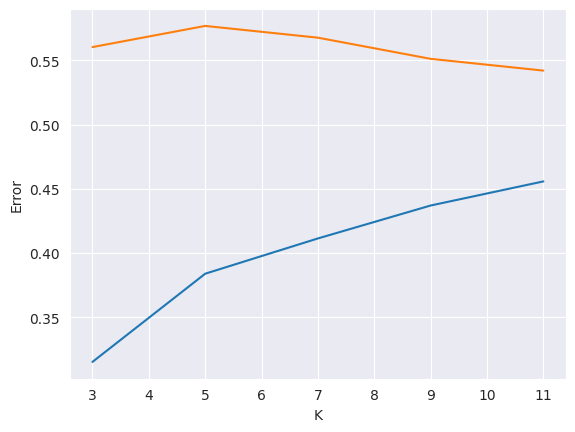

In [ ]:
plt.plot([3,5,7,9,11], [train_error_3, train_error_5, train_error_7, train_error_9, train_error_11], label='Train error')
plt.plot([3,5,7,9,11], [test_error_3, test_error_5, test_error_7, test_error_9, test_error_11], label='Test error')

plt.xlabel('K')
plt.ylabel('Error')

plt.show()

In [ ]:
k_values = [3,5,7,9,11]
train_errors = [train_error_3, train_error_5, train_error_7, train_error_9, train_error_11]
test_errors = [test_error_3, test_error_5, test_error_7, test_error_9, test_error_11]
df_demo = pd.DataFrame({'K': k_values,
'Train Error': train_errors,
'Test Error': test_errors})

df_demo

,K,Train Error,Test Error
0,3,0.315163,0.560440
1,5,0.383875,0.576923
2,7,0.411361,0.567766
3,9,0.437013,0.551282
4,11,0.455795,0.542125


In [ ]:
y_pred = knn_11.predict(X_test)

#Danh gia mo hinh KNN
print("KNN Model Evaluation: ")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)

KNN Model Evaluation: 
[[100  20  71]
 [ 37  29  57]
 [ 83  28 121]]
              precision    recall  f1-score   support

           0       0.45      0.52      0.49       191
           1       0.38      0.24      0.29       123
           2       0.49      0.52      0.50       232

    accuracy                           0.46       546
   macro avg       0.44      0.43      0.43       546
weighted avg       0.45      0.46      0.45       546



In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
# Chia dữ liệu thành 5 fold
kf = KFold(n_splits=5)
# List để lưu kết quả của các lần kiểm tra
test_accuracies = []

# Thực hiện cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    test_accuracies.append(accuracy)

# Tính trung bình kết quả của các lần kiểm tra
mean_accuracy = sum(test_accuracies) / len(test_accuracies)
print("Mean Test Accuracy:", mean_accuracy)
print("Test:", test_accuracies)

Mean Test Accuracy: 0.41003595792586617
Test: [0.39194139194139194, 0.4065934065934066, 0.4432234432234432, 0.41025641025641024, 0.3981651376146789]


In [ ]:
#Su dung Navive-bayes de phan loai
# Khoi tao mo hinh Naive-Bayes
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

#Du doan nhan cho tap kiem tra
y_pred_nb = nb_model.predict(X_test)

#Danh gia mo hinh Naive-Bayes tren tap kiem tra
print("Navie-Bayes Model Evalution on TestData:")
print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

Navie-Bayes Model Evalution on TestData:
[[ 20   0 222]
 [  5   0 110]
 [  5   0 183]]
              precision    recall  f1-score   support

           0       0.67      0.08      0.15       242
           1       0.00      0.00      0.00       115
           2       0.36      0.97      0.52       188

    accuracy                           0.37       545
   macro avg       0.34      0.35      0.22       545
weighted avg       0.42      0.37      0.24       545



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
my_df = pd.read_csv("/content/drive/MyDrive/dataset/DataSetBTL/Layoff_predict/Layoff-clean-labelEncode-predict2.csv")
my_df.head()

,industry,percentage,funds_raised,stage,country,laid_off_count,month,day,year
0,2,1.000000,197.0,4,59,'\'(245.743-inf)\'',6,23,2023
1,19,0.090000,141.0,4,59,'\'(245.743-inf)\'',6,22,2023
2,19,0.265282,300.0,14,59,'\'(245.743-inf)\'',6,21,2023
3,27,0.265282,25200.0,13,59,'\'(74.5-245.743]\'',6,21,2023
4,13,0.265282,148.0,4,59,'\'(74.5-245.743]\'',6,21,2023


In [ ]:
my_df = my_df[[col for col in my_df.columns if col != "laid_off_count"] + ["laid_off_count"]]
my_df['laid_off_count'].unique()

array(["'\\'(245.743-inf)\\''", "'\\'(74.5-245.743]\\''",
       "'\\'(-inf-74.5]\\''"], dtype=object)

In [ ]:
label_mapping = {
    "'\\'(-inf-74.5]\\''": 0,
     "'\\'(74.5-245.743]\\''": 1,
    "'\\'(245.743-inf)\\''": 2

    # "'\\'(-inf-40.5]\\''":0,
    # "'\\'(40.5-99.5]\\''":1,
    # "'\\'(99.5-245.74288]\\''":2,
    # "'\\'(245.74288-248.24288]\\''":3,
    # "'\\'(248.24288-inf)\\''":4
}
# Áp dụng bản đồ tương ứng vào cột laid_off_count
my_df['laid_off_count'] = my_df['laid_off_count'].map(label_mapping)

In [ ]:
my_df.head(15)

,industry,percentage,funds_raised,stage,country,month,day,year,laid_off_count
0,2,1.000000,197.0,4,59,6,23,2023,2
1,19,0.090000,141.0,4,59,6,22,2023,2
2,19,0.265282,300.0,14,59,6,21,2023,2
3,27,0.265282,25200.0,13,59,6,21,2023,1
4,13,0.265282,148.0,4,59,6,21,2023,1
5,9,0.400000,134.0,4,7,6,21,2023,0
6,12,0.265282,306.0,12,59,6,21,2023,2
7,27,0.110000,16500.0,13,48,6,20,2023,2
8,17,0.265282,157.0,14,34,6,20,2023,2
9,9,1.000000,13.0,0,58,6,20,2023,2


In [ ]:
#Su dung Navive-bayes de phan loai
# Khoi tao mo hinh Naive-Bayes
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

#Du doan nhan cho tap kiem tra
y_pred_nb = nb_model.predict(X_test)

#Danh gia mo hinh Naive-Bayes tren tap kiem tra
print("Navie-Bayes Model Evalution on TestData:")
print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

Navie-Bayes Model Evalution on TestData:
[[ 20   0 222]
 [  5   0 110]
 [  5   0 183]]
              precision    recall  f1-score   support

           0       0.67      0.08      0.15       242
           1       0.00      0.00      0.00       115
           2       0.36      0.97      0.52       188

    accuracy                           0.37       545
   macro avg       0.34      0.35      0.22       545
weighted avg       0.42      0.37      0.24       545



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
le = LabelEncoder()
my_df['laid_off_count']=le.fit_transform(my_df["laid_off_count"])
X = my_df.drop("laid_off_count",axis=1)
y = my_df['laid_off_count']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Tạo mô hình SVM
model = svm.SVC(kernel='rbf')  # Chọn loại kernel (linear, rbf, poly, etc.)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán nhãn
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4249084249084249


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
import numpy
# Load the data
data = pd.read_csv('/content/drive/MyDrive/dataset/DataSetBTL/Layoff_predict/Layoff-clean-labelEncode-predict1.csv')
print(data['laid_off_count'].head(10))

label_mapping = {
    "'\\'(-inf-40.5]\\''":0,
    "'\\'(40.5-99.5]\\''":1,
    "'\\'(99.5-245.74288]\\''":2,
    "'\\'(245.74288-248.24288]\\''":3,
    "'\\'(248.24288-inf)\\''":4
}
data['laid_off_count'] = data['laid_off_count'].map(label_mapping)

# Separate features and labels
print(data)
data.to_csv('/content/drive/MyDrive/dataset/DataSetBTL/layoff.csv')
print(data['laid_off_count'].head(10))

X = data.drop(columns=['laid_off_count'])  # Features
y = data['laid_off_count']  # Labels


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=5)

# Fit the model on the training data
clf.fit(X_train, y_train)

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns.tolist(),
                           class_names=[str(c) for c in clf.classes_],
                           filled=True, rounded=True, special_characters=True)

# Create a Graphviz object from the DOT data
graph = graphviz.Source(dot_data)

# # Save the visualization as a PDF file
graph.render('/content/drive/MyDrive/dataset/DataSetBTL/Layoff_predict/decision_tree1', format='pdf')

param_grid = {
    'criterion':['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth':[None,3,5,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid_search = GridSearchCV(clf,param_grid,cv=9,scoring='accuracy')
grid_search.fit(X_train,y_train)
#Lua chon mo hinh tot nhat sau khi thu nghiem
best_clf = grid_search.best_estimator_
#In ra thong so tot nhat
print("Best Parameters: ",grid_search.best_params_)
print("Best Accuracy: ",grid_search.best_score_)

0    '\'(245.74288-248.24288]\''
1    '\'(245.74288-248.24288]\''
2          '\'(248.24288-inf)\''
3         '\'(99.5-245.74288]\''
4              '\'(40.5-99.5]\''
5              '\'(-inf-40.5]\''
6    '\'(245.74288-248.24288]\''
7          '\'(248.24288-inf)\''
8          '\'(248.24288-inf)\''
9    '\'(245.74288-248.24288]\''
Name: laid_off_count, dtype: object
      industry  percentage  funds_raised  stage  country  laid_off_count  \
0            2    1.000000         197.0      4       59               3   
1           19    0.090000         141.0      4       59               3   
2           19    0.265282         300.0     14       59               4   
3           27    0.265282       25200.0     13       59               2   
4           13    0.265282         148.0      4       59               1   
...        ...         ...           ...    ...      ...             ...   
2724        28    1.000000           5.1      1       59               3   
2725        27    0.100000

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_4 = DecisionTreeClassifier(max_depth=4)
dt_5 = DecisionTreeClassifier(max_depth=5)
dt_6 = DecisionTreeClassifier(max_depth=6)

rep_4 = ExtraTreeClassifier(max_depth=4)
rep_5 = ExtraTreeClassifier(max_depth=5)
rep_6 = ExtraTreeClassifier(max_depth=6)

rf_4 = RandomForestClassifier(max_depth=4)
rf_5 = RandomForestClassifier(max_depth=5)
rf_6 = RandomForestClassifier(max_depth=6)

dt_4.fit(X_train, y_train)
dt_5.fit(X_train, y_train)
dt_6.fit(X_train, y_train)

rep_4.fit(X_train, y_train)
rep_5.fit(X_train, y_train)
rep_6.fit(X_train, y_train)

rf_4.fit(X_train, y_train)
rf_5.fit(X_train, y_train)
rf_6.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [ ]:
y_pred_dt_4 = dt_4.predict(X_test)
y_pred_dt_5 = dt_5.predict(X_test)
y_pred_dt_6 = dt_6.predict(X_test)

y_pred_rep_4 = rep_4.predict(X_test)
y_pred_rep_5 = rep_5.predict(X_test)
y_pred_rep_6 = rep_6.predict(X_test)

y_pred_rf_4 = rf_4.predict(X_test)
y_pred_rf_5 = rf_5.predict(X_test)
y_pred_rf_6 = rf_6.predict(X_test)

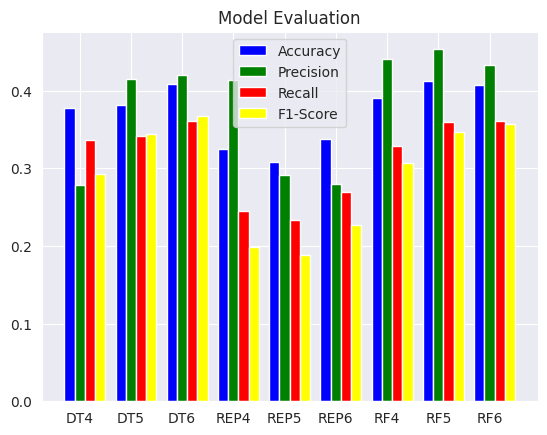

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

algorithms = ['DT4', 'DT5', 'DT6', 'REP4' ,'REP5', 'REP6', 'RF4', 'RF5', 'RF6']
accuracies = []
precisions = []
recalls = []
f1_scores = []

for y_pred in [y_pred_dt_4, y_pred_dt_5, y_pred_dt_6, y_pred_rep_4, y_pred_rep_5, y_pred_rep_6, y_pred_rf_4, y_pred_rf_5, y_pred_rf_6]:
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

x = np.arange(len(algorithms))
width = 0.2

plt.bar(x - 0.2, accuracies, width, label='Accuracy', color='blue')
plt.bar(x, precisions, width, label='Precision', color='green')
plt.bar(x + 0.2, recalls, width, label='Recall', color='red')
plt.bar(x + 0.4, f1_scores, width, label='F1-Score', color='yellow')

plt.xticks(x, algorithms)
plt.legend()
plt.title('Model Evaluation')
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=7)
selector.fit(X_train, y_train)

X_train_reduced = selector.transform(X_train)
X_test_reduced = selector.transform(X_test)

# Huấn luyện và đánh giá lại mô hình trên tập dữ liệu đã giảm chiều
dt_4.fit(X_train_reduced, y_train)
dt_5.fit(X_train_reduced, y_train)
dt_6.fit(X_train_reduced, y_train)

rep_4.fit(X_train_reduced, y_train)
rep_5.fit(X_train_reduced, y_train)
rep_6.fit(X_train_reduced, y_train)

rf_4.fit(X_train_reduced, y_train)
rf_5.fit(X_train_reduced, y_train)
rf_6.fit(X_train_reduced, y_train)

# Đánh giá lại các mô hình trên tập Test
y_pred_dt4 = dt_4.predict(X_test_reduced)
y_pred_dt5 = dt_5.predict(X_test_reduced)
y_pred_dt6 = dt_6.predict(X_test_reduced)

y_pred_rep4 = rep_4.predict(X_test_reduced)
y_pred_rep5 = rep_5.predict(X_test_reduced)
y_pred_rep6 = rep_6.predict(X_test_reduced)

y_pred_rf4 = rf_4.predict(X_test_reduced)
y_pred_rf5 = rf_5.predict(X_test_reduced)
y_pred_rf6 = rf_6.predict(X_test_reduced)

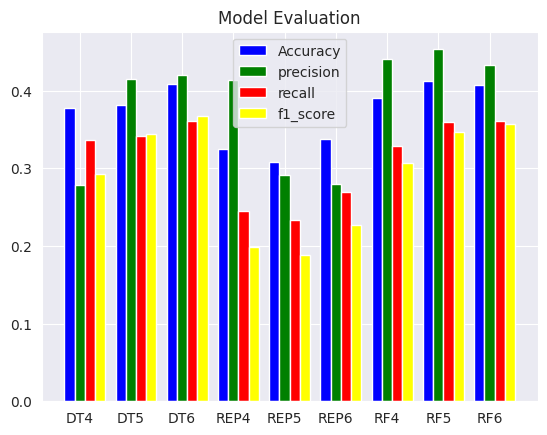

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

algorithms = ['DT4', 'DT5', 'DT6', 'REP4' ,'REP5', 'REP6', 'RF4', 'RF5','RF6']
accuracies =[]
precisions =[]
recalls=[]
f1_scores =[]

for y_pred in [y_pred_dt_4,y_pred_dt_5,y_pred_dt_6,y_pred_rep_4,y_pred_rep_5,y_pred_rep_6,y_pred_rf_4,y_pred_rf_5,y_pred_rf_6]:
  accuracies.append(accuracy_score(y_test, y_pred))
  precisions.append(precision_score(y_test, y_pred, average='macro'))
  recalls.append(recall_score(y_test, y_pred, average='macro'))
  f1_scores.append(f1_score(y_test, y_pred, average='macro'))


x= np.arange(len(algorithms))
width = 0.2

plt.bar(x-0.2, accuracies, width, label ='Accuracy', color ='blue')
plt.bar(x, precisions, width, label ='precision', color ='green')
plt.bar(x+0.2, recalls, width, label ='recall', color ='red')
plt.bar(x+0.4, f1_scores, width, label ='f1_score', color ='yellow')

plt.xticks(x,algorithms)
plt.legend()
plt.title('Model Evaluation')
plt.show()

In [ ]:
# my_df.to_csv('/content/drive/MyDrive/dataset/DataSetBTL/Layoff-treedata.csv', index=False)

In [ ]:
# import graphviz
# from sklearn.tree import export_graphviz

# # Chọn thuật toán REP và xây dựng mô hình
# from sklearn.tree import DecisionTreeClassifier
# clf_rep = DecisionTreeClassifier(criterion='entropy', min_samples_split=20)
# clf_rep.fit(X_train, y_train)

# # Xuất ra file .dot
# dot_data = export_graphviz(clf_rep, out_file=None,
#                            feature_names=rep_5,
#                            class_names=y_pred_rep5,
#                            filled=True, rounded=True, special_characters=True)

# # Tạo biểu đồ từ file .dot
# graph = graphviz.Source(dot_data)
# graph.render('REP_tree', format='png')  # Lưu biểu đồ dưới dạng hình ảnh

# # Hiển thị biểu đồ
# graph

